In [116]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Library

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

#EDA

## 1. Shelf Information


In [118]:
shelf_df = pd.read_csv('/content/drive/MyDrive/DSTC/Dataset/03_Shelf_Information_Data.csv')
shelf_df

,Shelf ID,Description,Location_x (center),Location_y (center),Width,Height,Length,Number of items,Shape
0,0,Quầy bánh kẹo,1100,550,300,180,300,13,Quầy tròn
1,1,Quầy hoá mỹ phẩm,350,500,100,180,400,18,Kệ hàng
2,2,Quầy sữa,600,400,100,180,600,9,Kệ hàng
3,3,Quầy thực phẩm,1450,400,100,180,600,25,Kệ hàng
4,4,Quầy gia vị,1100,150,500,180,100,19,Kệ hàng
5,5,Quầy gia dụng,350,950,700,180,100,16,Kệ hàng
6,6,Quầy sách và đồ chơi,50,400,100,180,600,16,Kệ hàng
7,7,Quầy đông lạnh,1150,950,700,180,100,16,Kệ hàng


In [119]:
shelf_df.dtypes

,0
Shelf ID,int64
Description,object
Location_x (center),int64
Location_y (center),int64
Width,int64
Height,int64
Length,int64
Number of items,int64
Shape,object


In [120]:
shelf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Shelf ID             8 non-null      int64 
 1   Description          8 non-null      object
 2   Location_x (center)  8 non-null      int64 
 3   Location_y (center)  8 non-null      int64 
 4   Width                8 non-null      int64 
 5   Height               8 non-null      int64 
 6   Length               8 non-null      int64 
 7   Number of items      8 non-null      int64 
 8   Shape                8 non-null      object
dtypes: int64(7), object(2)
memory usage: 704.0+ bytes


## 2. Item Information


In [121]:
item_df = pd.read_csv('/content/drive/MyDrive/DSTC/Dataset/03_Item_Information_Data.csv')
item_df.head()

,Shelf ID,Item ID,Name,Origin,Location,Weight (g),Price,NSX,HSD,Marketing strategy,Discount,Rate
0,0,0,Bánh Oreo,Vietnam,Cao,120.0,"17,500 ₫",2023-11-14,2024-10-17,False,10,4
1,0,1,Bánh Chocopie,Vietnam,Cao,396.0,"48,000 ₫",2023-10-07,2024-09-16,False,0,3
2,0,2,Kẹo cao su Cool Air Fresh,Vietnam,Trung bình,40.0,"40,000 ₫",2024-06-02,2026-06-02,False,0,3
3,0,3,Bánh mỳ chà bông Kinh đô,Vietnam,Trung bình,80.0,"13,400 ₫",2024-05-02,2026-05-02,False,0,3
4,0,4,Bánh trứng Custard,Thái Lan,Trung bình,46.0,"17,000 ₫",2023-10-30,2024-04-16,True,10,4


In [122]:
item_df.dtypes

,0
Shelf ID,int64
Item ID,int64
Name,object
Origin,object
Location,object
Weight (g),float64
Price,object
NSX,object
HSD,object
Marketing strategy,bool


In [123]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Shelf ID            134 non-null    int64  
 1   Item ID             134 non-null    int64  
 2   Name                134 non-null    object 
 3   Origin              134 non-null    object 
 4   Location            134 non-null    object 
 5   Weight (g)          110 non-null    float64
 6   Price               134 non-null    object 
 7   NSX                 100 non-null    object 
 8   HSD                 100 non-null    object 
 9   Marketing strategy  134 non-null    bool   
 10  Discount            134 non-null    int64  
 11  Rate                134 non-null    int64  
dtypes: bool(1), float64(1), int64(4), object(6)
memory usage: 11.8+ KB


In [124]:
item_df = item_df.drop(['NSX','HSD'],axis = 1)
item_df.columns

Index(['Shelf ID', 'Item ID', 'Name', 'Origin', 'Location', 'Weight (g)',
       'Price', 'Marketing strategy', 'Discount ', 'Rate'],
      dtype='object')

In [125]:
item_df['Price'] = item_df['Price'].replace({'₫':'',',':''},regex=True).astype(float)
item_df['Price']

,Price
0,17500.0
1,48000.0
2,40000.0
3,13400.0
4,17000.0
...,...
129,33000.0
130,27000.0
131,58500.0
132,32000.0


In [126]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Shelf ID            134 non-null    int64  
 1   Item ID             134 non-null    int64  
 2   Name                134 non-null    object 
 3   Origin              134 non-null    object 
 4   Location            134 non-null    object 
 5   Weight (g)          110 non-null    float64
 6   Price               134 non-null    float64
 7   Marketing strategy  134 non-null    bool   
 8   Discount            134 non-null    int64  
 9   Rate                134 non-null    int64  
dtypes: bool(1), float64(2), int64(4), object(3)
memory usage: 9.7+ KB


In [176]:
item_df.to_csv('/content/drive/MyDrive/DSTC/Processed/item_df_processed.csv')

## 3. Customer Behavior

In [127]:
customer_df = pd.read_csv('/content/drive/MyDrive/DSTC/Dataset/03_Customer_Behavior_Data.csv')
customer_df.head()

,Shelf ID,Person ID,Timestamp,Age,Gender,Height,Weight,Married status,Moving speed (m/s),Item ID,Looking at item (s),Holding the item (s),Holding the bag,Picking up item,Returning item,Putting item into bag,Taking item out of bag,Putting item into bag in the 2nd time
0,4,1,1720260000,52,Female,162,41,Married,0.19,16,27,36,True,True,False,False,False,True
1,4,1,1720260120,52,Female,162,41,Married,0.49,5,22,17,True,True,False,True,True,True
2,4,1,1720260300,52,Female,162,41,Married,0.36,4,25,39,True,True,True,True,True,False
3,4,1,1720260360,52,Female,162,41,Married,0.64,8,21,35,True,True,True,False,False,False
4,4,1,1720260480,52,Female,162,41,Married,0.13,6,27,16,True,True,False,False,False,True


In [128]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15394 entries, 0 to 15393
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Shelf ID                               15394 non-null  int64  
 1   Person ID                              15394 non-null  int64  
 2   Timestamp                              15394 non-null  int64  
 3   Age                                    15394 non-null  int64  
 4   Gender                                 15394 non-null  object 
 5   Height                                 15394 non-null  int64  
 6   Weight                                 15394 non-null  int64  
 7   Married status                         15394 non-null  object 
 8   Moving speed (m/s)                     15394 non-null  float64
 9   Item ID                                15394 non-null  int64  
 10  Looking at item (s)                    15394 non-null  int64  
 11  Ho

In [129]:
missing_value_count = customer_df.isnull().sum()
missing_value_count

,0
Shelf ID,0
Person ID,0
Timestamp,0
Age,0
Gender,0
Height,0
Weight,0
Married status,0
Moving speed (m/s),0
Item ID,0


In [130]:
# Phần trăm giá trị bị thiếu trên bộ dữ liệu
total_count = np.product(customer_df.shape)
per_mis = missing_value_count.sum()/total_count
print(per_mis*100)

2.1476621483117517


Do dữ liệu bị thiếu chỉ chiếm 2% bộ dữ liệu, drop các hàng bị thiếu

In [131]:
customer_df = customer_df.dropna()
customer_df

,Shelf ID,Person ID,Timestamp,Age,Gender,Height,Weight,Married status,Moving speed (m/s),Item ID,Looking at item (s),Holding the item (s),Holding the bag,Picking up item,Returning item,Putting item into bag,Taking item out of bag,Putting item into bag in the 2nd time
0,4,1,1720260000,52,Female,162,41,Married,0.19,16,27,36,True,True,False,False,False,True
1,4,1,1720260120,52,Female,162,41,Married,0.49,5,22,17,True,True,False,True,True,True
2,4,1,1720260300,52,Female,162,41,Married,0.36,4,25,39,True,True,True,True,True,False
3,4,1,1720260360,52,Female,162,41,Married,0.64,8,21,35,True,True,True,False,False,False
4,4,1,1720260480,52,Female,162,41,Married,0.13,6,27,16,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15389,2,1500,1720151340,52,Female,154,44,Single,0.52,4,32,35,False,True,False,True,True,True
15390,3,1500,1720151640,52,Female,154,44,Single,0.85,3,30,28,False,True,False,True,True,True
15391,3,1500,1720151760,52,Female,154,44,Single,0.76,21,54,56,False,True,False,False,True,False
15392,3,1500,1720151880,52,Female,154,44,Single,1.41,13,16,25,False,True,False,False,True,True


In [132]:
customer_df.isnull().sum()

,0
Shelf ID,0
Person ID,0
Timestamp,0
Age,0
Gender,0
Height,0
Weight,0
Married status,0
Moving speed (m/s),0
Item ID,0


In [133]:
customer_df['Timestamp'] = pd.to_datetime(customer_df['Timestamp'], unit='s')
customer_df['Date'] = customer_df['Timestamp'].dt.date
customer_df['Time'] = customer_df['Timestamp'].dt.time
customer_df.head(5)

<ipython-input-133-2f572b19f000>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df['Timestamp'] = pd.to_datetime(customer_df['Timestamp'], unit='s')
<ipython-input-133-2f572b19f000>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df['Date'] = customer_df['Timestamp'].dt.date
<ipython-input-133-2f572b19f000>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Shelf ID,Person ID,Timestamp,Age,Gender,Height,Weight,Married status,Moving speed (m/s),Item ID,Looking at item (s),Holding the item (s),Holding the bag,Picking up item,Returning item,Putting item into bag,Taking item out of bag,Putting item into bag in the 2nd time,Date,Time
0,4,1,2024-07-06 10:00:00,52,Female,162,41,Married,0.19,16,27,36,True,True,False,False,False,True,2024-07-06,10:00:00
1,4,1,2024-07-06 10:02:00,52,Female,162,41,Married,0.49,5,22,17,True,True,False,True,True,True,2024-07-06,10:02:00
2,4,1,2024-07-06 10:05:00,52,Female,162,41,Married,0.36,4,25,39,True,True,True,True,True,False,2024-07-06,10:05:00
3,4,1,2024-07-06 10:06:00,52,Female,162,41,Married,0.64,8,21,35,True,True,True,False,False,False,2024-07-06,10:06:00
4,4,1,2024-07-06 10:08:00,52,Female,162,41,Married,0.13,6,27,16,True,True,False,False,False,True,2024-07-06,10:08:00


In [177]:
customer_df.to_csv('/content/drive/MyDrive/DSTC/Processed/customer_df_processed.csv',index=False)

# Trả lời câu hỏi

## 1. Thống kê 5 mặt hàng có tổng thời gian nhìn và cầm xem lâu nhất?

In [135]:
customer_df_ex_1 = customer_df.copy()
look_hold_df = customer_df_ex_1.merge(item_df[['Shelf ID','Item ID','Name']],how='inner',on=['Shelf ID','Item ID'])

In [136]:
group_look_hold_df =(
    look_hold_df
    .groupby(by=['Shelf ID','Item ID','Name'])
    .agg({'Looking at item (s)':'sum',
          'Holding the item (s)':'sum'})
    .assign(Total=lambda df: df['Looking at item (s)'] + df['Holding the item (s)'])
    .sort_values(by='Total',ascending=False)
)
group_look_hold_df.head(5)

Looking at item (s)  \
Shelf ID Item ID Name                                                            
7        6       Sữa chua uống Yakult                                     7723   
         7       Sữa chua uống Probi                                      7411   
2        1       Lốc 4 hộp sữa tươi ít đường TH true MILK                 4719   
         7       Sữa bột Milo                                             5092   
0        4       Bánh trứng Custard                                       4481   

                                                           Holding the item (s)  \
Shelf ID Item ID Name                                                             
7        6       Sữa chua uống Yakult                                      7726   
         7       Sữa chua uống Probi                                       7313   
2        1       Lốc 4 hộp sữa tươi ít đường TH true MILK                  4877   
         7       Sữa bột Milo                                              4466   
0        4       Bánh trứng Custard                                        4694   

                                                           Total  
Shelf ID Item ID Name                                             
7        6       Sữa chua uống Yakult                      15449  
         7       Sữa chua uống Probi                       14724  
2        1       Lốc 4 hộp sữa tươi ít đường TH true MILK   9596  
         7       Sữa bột Milo                               9558  
0        4       Bánh trứng Custard                         9175

## 2. Thống kê 5 mặt hàng thường được cầm lên rồi trả lại nhiều nhất?

In [137]:
customer_df_ex_2 = customer_df.copy()
pick_and_return_df = customer_df_ex_2.merge(item_df[['Shelf ID','Item ID','Name']],on=['Shelf ID','Item ID'],how = 'inner')

In [138]:
pick_and_return_df = (
    pick_and_return_df
    .query('`Picking up item` == True & `Returning item` == True')
    .groupby(by=['Shelf ID','Item ID','Name'])
    .agg({'Picking up item':'count',
          'Returning item': 'count'})
    .sort_values('Picking up item',ascending= False)
)
pick_and_return_df.head(5)

,,,Picking up item,Returning item
Shelf ID,Item ID,Name,,
0,7,Snack khoai tây Lays,73,73
2,2,4 hộp sữa lúa mạch Milo 180ml,70,70
7,12,Mý ý SG Food,68,68
0,3,Bánh mỳ chà bông Kinh đô,67,67
7,3,Sửa chua TH,66,66


## 3. Các nhóm khách hàng theo độ tuổi (Thiếu niên: 18 - 30; Trung niên: 31 - 60; Cao tuổi: > 60) mua mặt hàng nào nhiều nhất?

In [139]:
customer_df['Age'].max()

75

In [140]:
age_bins = [18,30,60,75]
age_name = ['Thiếu niên', 'Trung niên', 'Cao tuổi']
customer_df['Age Group'] = pd.cut(customer_df['Age'],bins=age_bins,labels=age_name,right=True)

In [141]:
customer_df

,Shelf ID,Person ID,Timestamp,Age,Gender,Height,Weight,Married status,Moving speed (m/s),Item ID,...,Holding the item (s),Holding the bag,Picking up item,Returning item,Putting item into bag,Taking item out of bag,Putting item into bag in the 2nd time,Date,Time,Age Group
0,4,1,2024-07-06 10:00:00,52,Female,162,41,Married,0.19,16,...,36,True,True,False,False,False,True,2024-07-06,10:00:00,Trung niên
1,4,1,2024-07-06 10:02:00,52,Female,162,41,Married,0.49,5,...,17,True,True,False,True,True,True,2024-07-06,10:02:00,Trung niên
2,4,1,2024-07-06 10:05:00,52,Female,162,41,Married,0.36,4,...,39,True,True,True,True,True,False,2024-07-06,10:05:00,Trung niên
3,4,1,2024-07-06 10:06:00,52,Female,162,41,Married,0.64,8,...,35,True,True,True,False,False,False,2024-07-06,10:06:00,Trung niên
4,4,1,2024-07-06 10:08:00,52,Female,162,41,Married,0.13,6,...,16,True,True,False,False,False,True,2024-07-06,10:08:00,Trung niên
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15389,2,1500,2024-07-05 03:49:00,52,Female,154,44,Single,0.52,4,...,35,False,True,False,True,True,True,2024-07-05,03:49:00,Trung niên
15390,3,1500,2024-07-05 03:54:00,52,Female,154,44,Single,0.85,3,...,28,False,True,False,True,True,True,2024-07-05,03:54:00,Trung niên
15391,3,1500,2024-07-05 03:56:00,52,Female,154,44,Single,0.76,21,...,56,False,True,False,False,True,False,2024-07-05,03:56:00,Trung niên
15392,3,1500,2024-07-05 03:58:00,52,Female,154,44,Single,1.41,13,...,25,False,True,False,False,True,True,2024-07-05,03:58:00,Trung niên


In [142]:
filter_df = customer_df[
    ((customer_df['Putting item into bag'] == True) &
     (customer_df['Taking item out of bag'] == False)) |
    (customer_df['Putting item into bag in the 2nd time'] == True)
]
ex_3_df = filter_df.merge(item_df[['Shelf ID','Item ID','Name']],on= ['Shelf ID','Item ID'],how = 'inner')
count_age_group = (
    ex_3_df
    .groupby(by=['Age Group','Shelf ID','Item ID','Name'])
    .size()
    .reset_index(name='Count')
)
count_age_group

<ipython-input-142-30d20bbedede>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ex_3_df


,Age Group,Shelf ID,Item ID,Name,Count
0,Thiếu niên,0,0,4 hộp sữa lúa mạch Milo 180ml,0
1,Thiếu niên,0,0,Bia 333,0
2,Thiếu niên,0,0,Bia Sài Gòn Special,0
3,Thiếu niên,0,0,Bibigo Mandu,0
4,Thiếu niên,0,0,Bim bim Oishi,0
...,...,...,...,...,...
80395,Cao tuổi,7,24,Ðường kính Toàn Phát,0
80396,Cao tuổi,7,24,Ðường phèn Biên Hoà,0
80397,Cao tuổi,7,24,Ðậu xanh,0
80398,Cao tuổi,7,24,Ðậu đỏ,0


In [143]:
most_pro_age_gr = (
    count_age_group
    .sort_values(by=['Age Group','Count'],ascending=[True,False])
    .groupby('Age Group')
    .first()
    .reset_index()
)
most_pro_age_gr

<ipython-input-143-6b27e6577751>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Age Group')


,Age Group,Shelf ID,Item ID,Name,Count
0,Thiếu niên,0,4,Bánh trứng Custard,41
1,Trung niên,7,0,Kem tràng tiền,83
2,Cao tuổi,0,4,Bánh trứng Custard,48


## 4. Ngày nào trong tuần có doanh thu cao nhất?

In [144]:
customer_df['Date'].min()

datetime.date(2024, 7, 1)

In [145]:
customer_df['Date'].max()

datetime.date(2024, 7, 8)

In [146]:
# filter_df là dữ liệu chỉ lưu thông tin khách hàng mua sản phẩm
filter_df = filter_df.merge(item_df[['Shelf ID','Item ID','Price']],on=['Shelf ID','Item ID'],how = 'inner')
filter_df.head(5)

,Shelf ID,Person ID,Timestamp,Age,Gender,Height,Weight,Married status,Moving speed (m/s),Item ID,...,Holding the bag,Picking up item,Returning item,Putting item into bag,Taking item out of bag,Putting item into bag in the 2nd time,Date,Time,Age Group,Price
0,4,1,2024-07-06 10:00:00,52,Female,162,41,Married,0.19,16,...,True,True,False,False,False,True,2024-07-06,10:00:00,Trung niên,28500.0
1,4,23,2024-07-06 13:12:00,65,Male,171,69,Married,0.53,16,...,True,True,True,False,False,True,2024-07-06,13:12:00,Cao tuổi,28500.0
2,4,35,2024-07-06 15:47:00,70,Male,171,78,Married,1.08,16,...,True,True,False,False,True,True,2024-07-06,15:47:00,Cao tuổi,28500.0
3,4,39,2024-07-06 16:10:00,51,Female,147,45,Married,0.27,16,...,True,True,True,True,False,False,2024-07-06,16:10:00,Trung niên,28500.0
4,4,121,2024-07-06 01:34:00,37,Male,170,72,Married,0.50,16,...,True,True,False,True,False,True,2024-07-06,01:34:00,Trung niên,28500.0


In [147]:
most_revenue_day = (
    filter_df
    .groupby('Date')
    .agg(Revenue=('Price', 'sum'))
    .sort_values(by='Revenue', ascending=False)
)
most_revenue_day.head(1)

,Revenue
Date,
2024-07-06,248891300.0


## 5. Trong 3 nhóm tuổi sau: Thiếu niên (18 - 30), Trung niên (31 - 60), Cao tuổi: (> 60), **nhóm** tuổi nào có số người đi siêu thị nhiều nhất?

In [148]:
most_go_supermarket = (
    customer_df
    .groupby(by='Age Group')['Person ID']
    .nunique()
    .reset_index(name='Count')
    .sort_values('Count', ascending=False)
)
most_go_supermarket

<ipython-input-148-09997b544cfb>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_df


,Age Group,Count
1,Trung niên,740
2,Cao tuổi,403
0,Thiếu niên,305


## 6. Top 5 các mặt hàng giảm giá được người dùng mua nhiều nhất?

In [149]:
filter_df_ex_6 = filter_df.copy()
filter_most_discount_products = filter_df_ex_6.merge(item_df[['Shelf ID','Item ID','Name','Discount ']],on=['Shelf ID','Item ID'],how = 'inner')
filter_most_discount_products.head(5)

,Shelf ID,Person ID,Timestamp,Age,Gender,Height,Weight,Married status,Moving speed (m/s),Item ID,...,Returning item,Putting item into bag,Taking item out of bag,Putting item into bag in the 2nd time,Date,Time,Age Group,Price,Name,Discount
0,4,1,2024-07-06 10:00:00,52,Female,162,41,Married,0.19,16,...,False,False,False,True,2024-07-06,10:00:00,Trung niên,28500.0,Dầu hào Maggi,10
1,4,23,2024-07-06 13:12:00,65,Male,171,69,Married,0.53,16,...,True,False,False,True,2024-07-06,13:12:00,Cao tuổi,28500.0,Dầu hào Maggi,10
2,4,35,2024-07-06 15:47:00,70,Male,171,78,Married,1.08,16,...,False,False,True,True,2024-07-06,15:47:00,Cao tuổi,28500.0,Dầu hào Maggi,10
3,4,39,2024-07-06 16:10:00,51,Female,147,45,Married,0.27,16,...,True,True,False,False,2024-07-06,16:10:00,Trung niên,28500.0,Dầu hào Maggi,10
4,4,121,2024-07-06 01:34:00,37,Male,170,72,Married,0.50,16,...,False,True,False,True,2024-07-06,01:34:00,Trung niên,28500.0,Dầu hào Maggi,10


In [150]:
most_discount_products  = (
    filter_most_discount_products
    .query('`Discount ` > 0 ')
    .groupby(['Shelf ID','Item ID','Name'])
    .size()
    .reset_index(name = 'Count')
    .sort_values('Count',ascending=False)
)
most_discount_products.head(5)

,Shelf ID,Item ID,Name,Count
58,7,0,Kem tràng tiền,149
1,0,4,Bánh trứng Custard,149
18,2,7,Sữa bột Milo,145
4,0,7,Snack khoai tây Lays,98
15,1,11,Khăn mặt Shine,94


## 7. Top 5 các mặt hàng được chạy quảng cáo được người dùng mua nhiều nhất?

In [151]:
filter_df_ex_7= filter_df.copy()
filter_most_marketing_products = filter_df_ex_6.merge(item_df[['Shelf ID','Item ID','Name','Marketing strategy']],on=['Shelf ID','Item ID'],how = 'inner')
filter_most_marketing_products.head(5)

,Shelf ID,Person ID,Timestamp,Age,Gender,Height,Weight,Married status,Moving speed (m/s),Item ID,...,Returning item,Putting item into bag,Taking item out of bag,Putting item into bag in the 2nd time,Date,Time,Age Group,Price,Name,Marketing strategy
0,4,1,2024-07-06 10:00:00,52,Female,162,41,Married,0.19,16,...,False,False,False,True,2024-07-06,10:00:00,Trung niên,28500.0,Dầu hào Maggi,False
1,4,23,2024-07-06 13:12:00,65,Male,171,69,Married,0.53,16,...,True,False,False,True,2024-07-06,13:12:00,Cao tuổi,28500.0,Dầu hào Maggi,False
2,4,35,2024-07-06 15:47:00,70,Male,171,78,Married,1.08,16,...,False,False,True,True,2024-07-06,15:47:00,Cao tuổi,28500.0,Dầu hào Maggi,False
3,4,39,2024-07-06 16:10:00,51,Female,147,45,Married,0.27,16,...,True,True,False,False,2024-07-06,16:10:00,Trung niên,28500.0,Dầu hào Maggi,False
4,4,121,2024-07-06 01:34:00,37,Male,170,72,Married,0.50,16,...,False,True,False,True,2024-07-06,01:34:00,Trung niên,28500.0,Dầu hào Maggi,False


In [152]:
most_marketing_products = (
    filter_most_marketing_products
    .query('`Marketing strategy` == True')
    .groupby(by=['Shelf ID','Item ID','Name'])
    .size()
    .reset_index(name='Count')
    .sort_values('Count',ascending= False)
)
most_marketing_products.head(5)

,Shelf ID,Item ID,Name,Count
0,0,4,Bánh trứng Custard,149
15,7,0,Kem tràng tiền,149
5,2,7,Sữa bột Milo,145
3,1,11,Khăn mặt Shine,94
2,1,10,Khăn tắm Shine,82


## 8. Top 3 quầy hàng có thời lượng trung bình quan tâm đến sản phẩm, trên số lượt tương tác, là lâu nhất (quan tâm tương ứng với việc nhìn và cầm xem)?

In [153]:
ex_8_df = customer_df.copy()
ex_8_df['Total Look and Hold item'] = ex_8_df['Looking at item (s)'] + ex_8_df['Holding the item (s)']

most_shelf_favor = (
    ex_8_df
    .groupby('Shelf ID')
    .agg({'Total Look and Hold item':'mean'})
    .reset_index()
    .rename(columns={'Total Look and Hold item': 'Avg Look and Hold item'})
    .sort_values('Avg Look and Hold item', ascending=False)
)
most_shelf_favor.head(3)

,Shelf ID,Avg Look and Hold item
5,5,61.856631
7,7,61.003271
3,3,59.610660


## 9. Top 3 quầy hàng có số sản phẩm được mua nhiều nhất?

In [154]:
filter_ex_9_df = filter_df.copy()
most_shelf_sales = (
    filter_ex_9_df
    .groupby('Shelf ID')
    .agg({'Item ID':'count'})
    .rename(columns={'Item ID':'Count bought items each shelf'})
    .sort_values('Count bought items each shelf', ascending=False)
)
most_shelf_sales.head(3)

,Count bought items each shelf
Shelf ID,
7,1414
1,1222
0,1176


Xác minh tổng 1414 + 1222 + 1176 + 890 + 862 + 602 + 398 + 369 = 6933 = tổng số hàng trong dữ liệu chỉ gồm thông tin sản phẩm được mua

## 10. Người dùng có thói quen di chuyển giữa 2 quầy hàng nào nhiều nhất?

In [155]:
df_ex_10 = customer_df.copy()
df_ex_10= df_ex_10.sort_values(by=['Person ID', 'Timestamp'])
df_ex_10['Previous Shelf ID'] = df_ex_10.groupby('Person ID')['Shelf ID'].shift(1)
df_ex_10.head(5)

,Shelf ID,Person ID,Timestamp,Age,Gender,Height,Weight,Married status,Moving speed (m/s),Item ID,...,Holding the bag,Picking up item,Returning item,Putting item into bag,Taking item out of bag,Putting item into bag in the 2nd time,Date,Time,Age Group,Previous Shelf ID
0,4,1,2024-07-06 10:00:00,52,Female,162,41,Married,0.19,16,...,True,True,False,False,False,True,2024-07-06,10:00:00,Trung niên,NaN
1,4,1,2024-07-06 10:02:00,52,Female,162,41,Married,0.49,5,...,True,True,False,True,True,True,2024-07-06,10:02:00,Trung niên,4.0
2,4,1,2024-07-06 10:05:00,52,Female,162,41,Married,0.36,4,...,True,True,True,True,True,False,2024-07-06,10:05:00,Trung niên,4.0
3,4,1,2024-07-06 10:06:00,52,Female,162,41,Married,0.64,8,...,True,True,True,False,False,False,2024-07-06,10:06:00,Trung niên,4.0
4,4,1,2024-07-06 10:08:00,52,Female,162,41,Married,0.13,6,...,True,True,False,False,False,True,2024-07-06,10:08:00,Trung niên,4.0


In [156]:
df_filtered = df_ex_10.dropna(subset=['Previous Shelf ID'])

In [157]:
df_filtered['Shelf Movement'] = df_filtered['Previous Shelf ID'].astype(int).astype(str) + ' → ' + df_filtered['Shelf ID'].astype(int).astype(str)


<ipython-input-157-e0a402af090a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Shelf Movement'] = df_filtered['Previous Shelf ID'].astype(int).astype(str) + ' → ' + df_filtered['Shelf ID'].astype(int).astype(str)


In [158]:
movement_counts = df_filtered['Shelf Movement'].value_counts().reset_index(name='Count')


In [159]:
movement_counts

,Shelf Movement,Count
0,7 → 7,1389
1,0 → 0,1181
2,1 → 1,1075
3,4 → 4,821
4,2 → 2,798
...,...,...
59,3 → 6,14
60,3 → 5,14
61,6 → 3,12
62,6 → 5,9


In [160]:
movement_counts.columns = ['Shelf Movement', 'Count']

In [161]:
movement_between_shelves = movement_counts[movement_counts['Shelf Movement'].str.contains(' → ') &
                                           (movement_counts['Shelf Movement'].str.split(' → ').str[0] != movement_counts['Shelf Movement'].str.split(' → ').str[1])]

In [162]:
movement_between_shelves = movement_between_shelves.sort_values(by='Count', ascending=False)
movement_between_shelves.head(1)

,Shelf Movement,Count
8,7 → 0,117


## 11. Có những mặt hàng nào cần được sắp xếp lại trong cửa hàng không?


1. Phân tích tương quan giữa của số lượng quan tâm của các sản phẩm dựa vào vị trí sản phẩm


In [163]:
df_ex_11 = customer_df.copy()
df_ex_11 = df_ex_11.merge(item_df[['Shelf ID','Item ID','Name','Location']],on=['Shelf ID','Item ID'],how = 'left')
df_ex_11.head(5)

,Shelf ID,Person ID,Timestamp,Age,Gender,Height,Weight,Married status,Moving speed (m/s),Item ID,...,Picking up item,Returning item,Putting item into bag,Taking item out of bag,Putting item into bag in the 2nd time,Date,Time,Age Group,Name,Location
0,4,1,2024-07-06 10:00:00,52,Female,162,41,Married,0.19,16,...,True,False,False,False,True,2024-07-06,10:00:00,Trung niên,Dầu hào Maggi,Trung bình
1,4,1,2024-07-06 10:02:00,52,Female,162,41,Married,0.49,5,...,True,False,True,True,True,2024-07-06,10:02:00,Trung niên,Dầu ăn Tường An,Cao
2,4,1,2024-07-06 10:05:00,52,Female,162,41,Married,0.36,4,...,True,True,True,True,False,2024-07-06,10:05:00,Trung niên,Dầu ăn Simply,Cao
3,4,1,2024-07-06 10:06:00,52,Female,162,41,Married,0.64,8,...,True,True,False,False,False,2024-07-06,10:06:00,Trung niên,Mỳ chính Miwon,Thấp
4,4,1,2024-07-06 10:08:00,52,Female,162,41,Married,0.13,6,...,True,False,False,False,True,2024-07-06,10:08:00,Trung niên,Dầu ăn Meizan,Cao


In [164]:
df_ex_11['Total look and focus item'] = df_ex_11['Looking at item (s)'] + df_ex_11['Holding the item (s)']

In [165]:
# Tính toán với mỗi vị trí, mức độ quan tâm trung bình là bao nhiêu
most_favor_location = (
    df_ex_11
    .groupby('Location')
    .agg({'Total look and focus item':'mean'})
    .reset_index()
    .rename(columns={'Total look and focus item':'Average look and focus item'})
    .sort_values('Average look and focus item',ascending = False)
)
most_favor_location

,Location,Average look and focus item
2,Trung bình,56.829639
1,Thấp,54.541234
0,Cao,53.528749


Nhìn chung, trung bình mức quan tâm các mặt hàng ở các vị trí **Trung bình**, **Thấp**, **Cao** gần bằng nhau (sai số 2-3 (s)). Khách hàng có xu hướng quan tâm các sản phẩm ở vị trí trung bình, thấp hơn vị trí cao tuy nhiên cách biệt không quá đáng kể

2. Phân tích tương quan giữa trọng lượng của sản phẩm và vị trí đặt sản phẩm

In [166]:
item_df_ex_11 = item_df.copy()
item_df_ex_11 = item_df_ex_11.dropna()

In [167]:
high_location_and_weight = (
    item_df_ex_11
    .query('`Location` == "Cao"')
    .sort_values(by="Weight (g)",ascending = False)
    .reset_index()
)
high_location_and_weight

,index,Shelf ID,Item ID,Name,Origin,Location,Weight (g),Price,Marketing strategy,Discount,Rate
0,90,5,6,Bếp điện từ Sunhouse,Vietnam,Cao,2000.0,849000.0,False,15,4
1,91,5,7,Bếp điện từ Lock&Lock,Vietnam,Cao,1850.0,1500000.0,True,20,3
2,92,5,8,Bếp nướng Sunhouse,Vietnam,Cao,1500.0,399000.0,False,10,3
3,93,5,9,Bếp nướng Lock&Lock,Vietnam,Cao,1300.0,845000.0,True,30,3
4,87,5,3,Nồi cơm điện Lock&Lock,Hàn Quốc,Cao,1200.0,1600000.0,True,30,3
5,86,5,2,Nồi cơm điện Kangaroo,Vietnam,Cao,1200.0,569000.0,False,10,5
6,84,5,0,Nồi cơm điện Sunhouse,Vietnam,Cao,1200.0,590000.0,False,30,3
7,85,5,1,Nồi cơm điện Cuckcoo,Hàn Quốc,Cao,1080.0,1350000.0,True,30,4
8,70,4,5,Dầu ăn Tường An,Vietnam,Cao,1000.0,64500.0,False,5,4
9,71,4,6,Dầu ăn Meizan,Vietnam,Cao,1000.0,47000.0,False,0,3


Sản phẩm ở vị trí cao thuộc nhóm:
- Đồ gia dụng giá trị cao
- Gia vị nấu ăn
- Bánh kẹo

In [168]:
medium_location_and_weight = (
    item_df_ex_11
    .query('`Location` == "Trung bình"')
    .sort_values(by="Weight (g)",ascending = False)
    .reset_index()
)
medium_location_and_weight

,index,Shelf ID,Item ID,Name,Origin,Location,Weight (g),Price,Marketing strategy,Discount,Rate
0,94,5,10,Máy xay sinh tố Comet,Vietnam,Trung bình,1500.0,639000.0,False,20,4
1,95,5,11,Máy xay sinh tố Sunhouse,Vietnam,Trung bình,1500.0,700000.0,False,25,4
2,61,3,21,Vang đỏ đà lạt,Vietnam,Trung bình,750.0,104000.0,False,10,3
3,59,3,19,Vodka Hà Nội,Vietnam,Trung bình,700.0,120000.0,False,30,5
4,63,3,23,Fanta,Vietnam,Trung bình,600.0,10300.0,False,20,3
5,96,5,12,Máy xay sinh tố Lock&Lock,Trung Quốc,Trung bình,600.0,500000.0,True,15,4
6,64,3,24,Sprite,Vietnam,Trung bình,600.0,10300.0,False,10,3
7,62,3,22,Coca Cola,Vietnam,Trung bình,600.0,10300.0,False,15,3
8,78,4,13,Xì dầu Tam Thái tử,Vietnam,Trung bình,500.0,8800.0,False,0,5
9,51,3,11,Phở khô Chinsu,Vietnam,Trung bình,500.0,35000.0,False,0,4


Sản phẩm ở vị trí trung bình thuộc các nhóm:
- Đồ gia dụng giá trị cao: Máy xay sinh tố
- Gia vị nấu ăn
- Bánh kẹo, đồ uống
- Sách

In [169]:
low_location_and_weight = (
    item_df_ex_11
    .query('`Location` == "Thấp"')
    .sort_values(by="Weight (g)",ascending = False)
    .reset_index()
)
low_location_and_weight

,index,Shelf ID,Item ID,Name,Origin,Location,Weight (g),Price,Marketing strategy,Discount,Rate
0,42,3,2,Gạo ST25 Neptune,Vietnam,Thấp,5000.0,139000.0,True,10,4
1,98,5,14,Phích cắm điện Ðiện Quang,Vietnam,Thấp,3200.0,270000.0,False,10,3
2,99,5,15,Ổ cắm điện Lioa,Vietnam,Thấp,2200.0,265000.0,False,5,3
3,76,4,11,Ðường phèn Biên Hoà,Vietnam,Thấp,1000.0,35500.0,False,10,5
4,34,2,3,Sữa bột Ensure Gold lúa mạch,Hoa Kỳ,Thấp,850.0,905000.0,False,0,3
5,35,2,4,Sửa bột Anele,New Zealand,Thấp,800.0,410000.0,False,10,5
6,16,1,3,Dầu gội Sunsilk,Vietnam,Thấp,631.0,145000.0,False,10,4
7,15,1,2,Dầu gội Dove,Vietnam,Thấp,621.0,166000.0,True,10,3
8,75,4,10,Ðường kính Toàn Phát,Vietnam,Thấp,500.0,13500.0,False,22,4
9,74,4,9,Mỳ chính Ajinomoto,Nhật Bản,Thấp,454.0,36000.0,False,10,4


Sản phẩm ở vị trí thấp thuộc các nhóm:
- Bánh kẹo
- Dầu gội
- Thiết bị gia dụng giá trị cao
- Gia vị nấu ăn
- Đồ ăn đóng gói

**Nhận xét:**

Hiện tại, các sản phẩm trên ba kệ hàng đang được sắp xếp lẫn lộn giữa nhiều danh mục, không có sự phân chia rõ ràng giữa thiết bị gia dụng và thực phẩm, cũng như giữa các sản phẩm giá trị cao và giá trị trung bình - thấp. Điều này không chỉ gây khó khăn cho việc thu hút sự chú ý của khách hàng, mà còn hạn chế khả năng tối ưu hóa không gian trưng bày, làm giảm hiệu quả bán hàng.

Tôi đề xuất việc sắp xếp lại sản phẩm theo các danh mục cụ thể, đảm bảo tính khoa học và khả năng thu hút khách hàng tốt hơn:

- Kệ trên cùng: Trưng bày các thiết bị gia dụng giá trị cao để thu hút sự chú ý của khách hàng ngay từ cái nhìn đầu tiên, đồng thời bảo đảm sản phẩm được bảo quản tốt nhất, tránh va chạm.

- Kệ giữa: Dành cho các sản phẩm thực phẩm phổ biến như gia vị, thực phẩm đóng gói, bánh kẹo và đồ uống. Đây là vị trí vừa tầm mắt của đa số khách hàng, thuận tiện cho việc quan sát và lựa chọn những sản phẩm tiêu dùng hàng ngày.

- Kệ dưới cùng: Trưng bày các sản phẩm khác không thuộc nhóm thực phẩm hoặc thiết bị, như sách, dầu gội và sản phẩm tiêu dùng cá nhân khác. Vị trí này giúp tạo sự tách biệt nhưng vẫn đảm bảo sự thuận tiện cho khách hàng khi cần lựa chọn sản phẩm bổ sung.

Việc sắp xếp này không chỉ giúp không gian trở nên ngăn nắp và khoa học, mà còn tối ưu hóa khả năng trưng bày, giúp khách hàng dễ dàng tiếp cận và lựa chọn sản phẩm theo từng nhóm cụ thể. Ngoài ra, cần có sự linh hoạt trong sắp xếp khi không gian kệ không đủ để chứa tất cả sản phẩm cùng danh mục, đảm bảo tối ưu hóa không gian hiện có mà vẫn duy trì sự hợp lý trong phân bổ sản phẩm.

## 12. Phân tích hiệu quả của các chiến dịch quảng cáo, sale đối với các mặt hàng.

In [170]:
customer_df_ex_12 = customer_df.copy()
customer_df_ex_12 = customer_df_ex_12.merge(item_df[['Shelf ID','Item ID','Name','Marketing strategy','Price']],on=['Shelf ID','Item ID'],how = 'inner')
customer_df_ex_12.head()

,Shelf ID,Person ID,Timestamp,Age,Gender,Height,Weight,Married status,Moving speed (m/s),Item ID,...,Returning item,Putting item into bag,Taking item out of bag,Putting item into bag in the 2nd time,Date,Time,Age Group,Name,Marketing strategy,Price
0,4,1,2024-07-06 10:00:00,52,Female,162,41,Married,0.19,16,...,False,False,False,True,2024-07-06,10:00:00,Trung niên,Dầu hào Maggi,False,28500.0
1,4,23,2024-07-06 13:12:00,65,Male,171,69,Married,0.53,16,...,True,False,False,True,2024-07-06,13:12:00,Cao tuổi,Dầu hào Maggi,False,28500.0
2,4,35,2024-07-06 15:47:00,70,Male,171,78,Married,1.08,16,...,False,False,True,True,2024-07-06,15:47:00,Cao tuổi,Dầu hào Maggi,False,28500.0
3,4,39,2024-07-06 16:10:00,51,Female,147,45,Married,0.27,16,...,True,True,False,False,2024-07-06,16:10:00,Trung niên,Dầu hào Maggi,False,28500.0
4,4,114,2024-07-06 00:30:00,46,Male,169,75,Married,0.66,16,...,False,False,False,False,2024-07-06,00:30:00,Trung niên,Dầu hào Maggi,False,28500.0


In [171]:
True_Marketing_df = customer_df_ex_12[customer_df_ex_12['Marketing strategy'] == True].copy()
True_Marketing_df['Total look and focus item'] = True_Marketing_df['Looking at item (s)'] + True_Marketing_df['Holding the item (s)']
Most_true_Marketing_df = (True_Marketing_df
                     .groupby(['Shelf ID','Item ID','Name'])
                     .agg({'Total look and focus item':'sum'})
                  .sort_values(by ='Total look and focus item',ascending= False )
)

False_Marketing_df = customer_df_ex_12[customer_df_ex_12['Marketing strategy'] == False].copy()
False_Marketing_df['Total look and focus item'] = False_Marketing_df['Looking at item (s)'] + False_Marketing_df['Holding the item (s)']
Most_false_Marketing_df = (False_Marketing_df
                     .groupby(['Shelf ID','Item ID','Name'])
                     .agg({'Total look and focus item':'sum'})
                  .sort_values(by ='Total look and focus item',ascending= False )
)

<ipython-input-173-9da4026a5949>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax[0],data=Most_true_Marketing_df.head(5),x='Total look and focus item',y='Name',palette='Blues_d',orient='h')
<ipython-input-173-9da4026a5949>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax[1],data=Most_false_Marketing_df .head(5),x='Total look and focus item',y='Name',palette = 'Reds_d',orient='h')


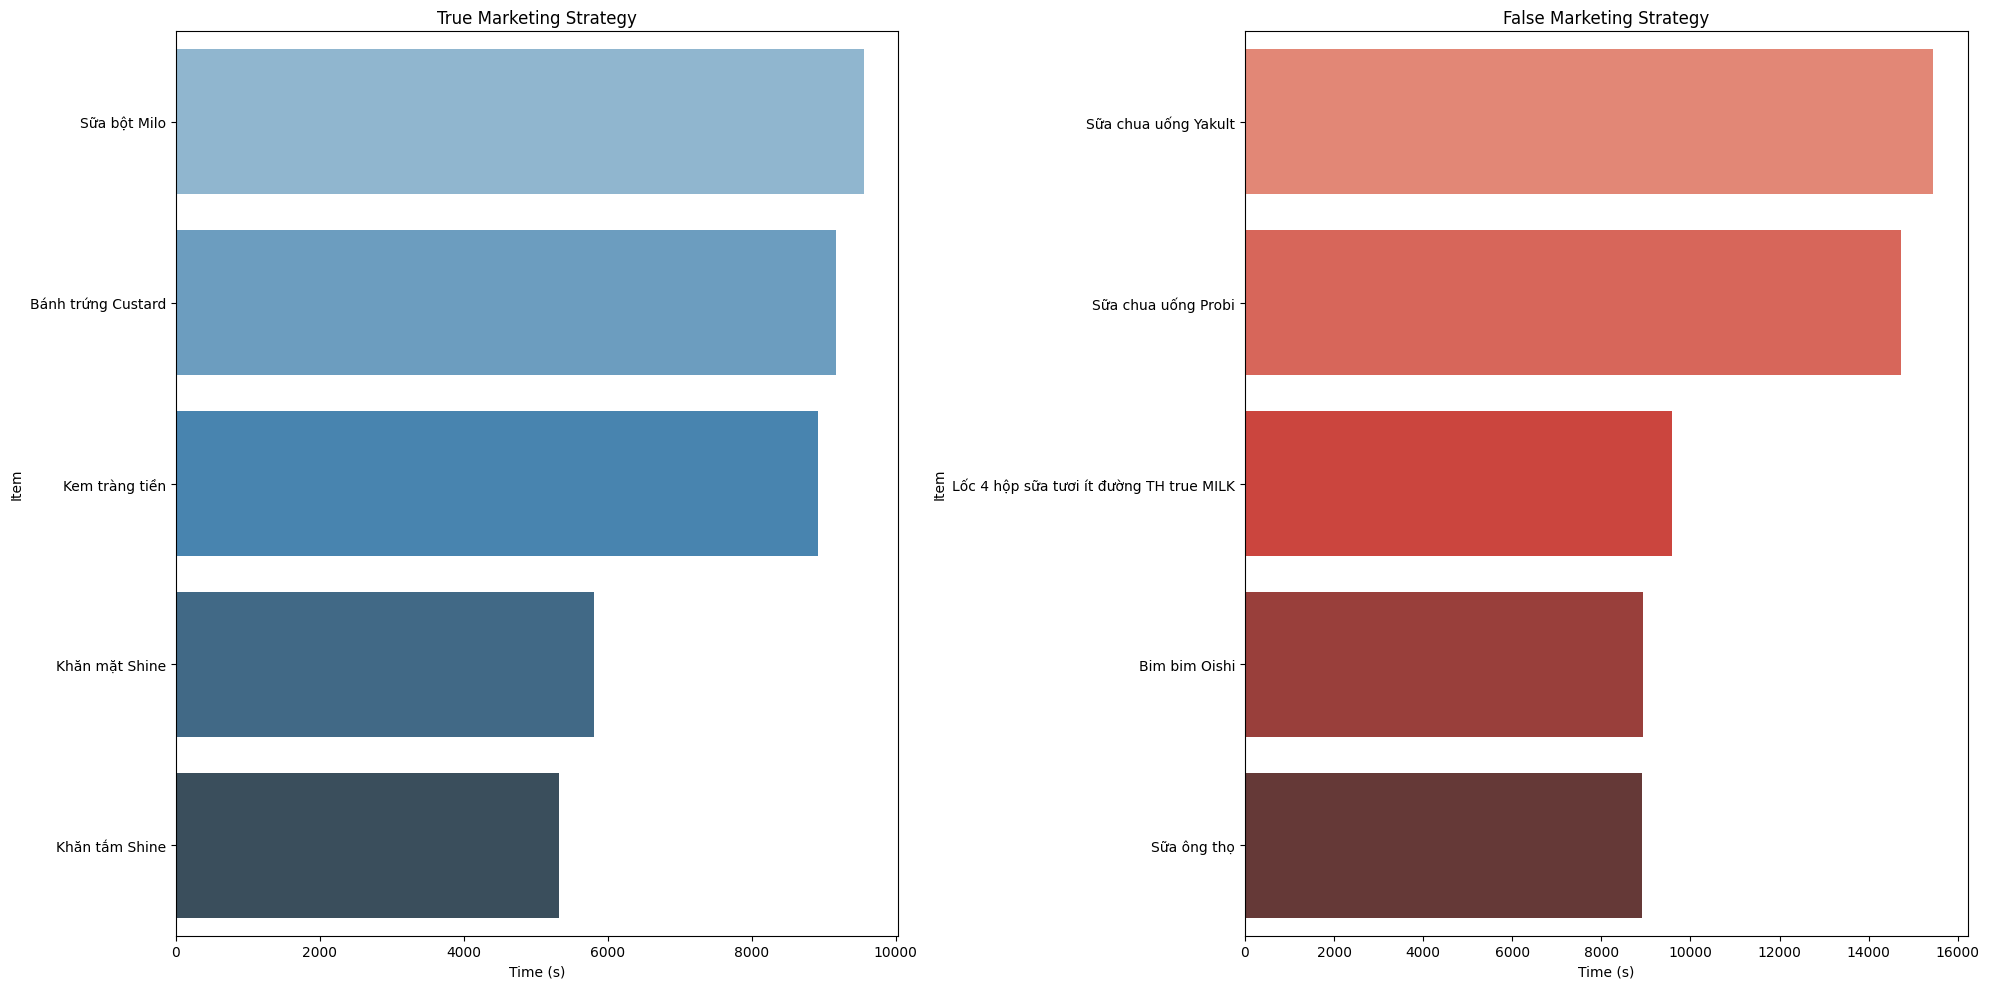

In [173]:
# Đánh giá sự hiệu quả của các chiến dịch quảng cáo với mức độ quan tâm của khách hàng với sản phẩm,
fig, ax = plt.subplots(1,2,figsize=(20,10))

sns.barplot(ax=ax[0],data=Most_true_Marketing_df.head(5),x='Total look and focus item',y='Name',palette='Blues_d',orient='h')
ax[0].set_title('True Marketing Strategy')
ax[0].set_ylabel('Item')
ax[0].set_xlabel('Time (s)')

sns.barplot(ax=ax[1],data=Most_false_Marketing_df .head(5),x='Total look and focus item',y='Name',palette = 'Reds_d',orient='h')
ax[1].set_title('False Marketing Strategy')
ax[1].set_ylabel('Item')
ax[1].set_xlabel('Time (s)')
plt.tight_layout()
plt.show()

**Nhận xét**

1. Sản phẩm có chiến dịch marketing: Các sản phẩm như Sữa bột Milo, Bánh trứng Custard, và Kem tràng tiền ghi nhận mức độ quan tâm của khách hàng, thông qua việc nhìn và cầm, lên tới 9.000 - 10.000 giây trong vòng 1 tuần. Mặc dù có sự hỗ trợ từ chiến dịch marketing, mức độ tương tác của khách hàng đối với các sản phẩm này chỉ dừng lại ở mức khá.

2. Sản phẩm không có chiến dịch marketing: Các sản phẩm như Sữa chua uống Yakult, Sữa chua uống Probi, và Lốc 4 hộp sữa tươi ít đường TH true milk lại ghi nhận mức độ quan tâm của khách hàng vượt trội hơn, với 15.000 - 16.000 giây trong cùng khoảng thời gian. Dù không có chiến dịch quảng bá cụ thể, những sản phẩm này vẫn tạo được sự thu hút mạnh mẽ, cho thấy khả năng tự tiêu thụ mà không cần sự hỗ trợ từ marketing.

3. Tổng quan: Nhìn chung, các sản phẩm có chiến dịch marketing chưa đạt được mức độ quan tâm cao bằng các sản phẩm không có chiến dịch marketing. Mức độ tương tác của khách hàng với các sản phẩm không quảng bá thậm chí cao hơn đáng kể, cho thấy rằng một số sản phẩm có sức hút tự nhiên mà không cần phụ thuộc vào marketing.

Kết luận: Chiến lược marketing, dù có hiệu quả nhất định, nhưng trong một số trường hợp, không phải là yếu tố quyết định duy nhất đến mức độ quan tâm của khách hàng. Các sản phẩm như sữa chua và sữa tươi có thể đạt được mức độ thu hút cao nhờ sự phổ biến và nhu cầu tự nhiên, bất chấp việc không có chiến dịch quảng bá.

In [174]:
# Đánh giá sự hiệu quả của các chiến dịch quảng cáo với số lượng mua hàng
True_Marketing_Sale_df = True_Marketing_df[
    ((True_Marketing_df['Putting item into bag'] == True) &
     (True_Marketing_df['Taking item out of bag'] == False)) |
    (True_Marketing_df['Putting item into bag in the 2nd time'] == True)
]

Most_sale_true_marketing = (
                            True_Marketing_Sale_df
                            .groupby(['Shelf ID','Item ID','Name'])
                            .agg({'Price':'sum'})
                            .sort_values('Price',ascending=False)
)
# Most_sale_true_marketing
False_Marketing_Sale_df = False_Marketing_df[
    ((False_Marketing_df['Putting item into bag'] == True) &
     (False_Marketing_df['Taking item out of bag'] == False)) |
    (False_Marketing_df['Putting item into bag in the 2nd time'] == True)
]

Most_sale_false_marketing = (
                            False_Marketing_Sale_df
                            .groupby(['Shelf ID','Item ID','Name'])
                            .agg({'Price':'sum'})
                            .sort_values('Price',ascending=False)
)

<ipython-input-175-e24f064a53a9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax[0],data = Most_sale_true_marketing.head(5),y='Name',x='Price',palette='Blues_d',orient='h')
<ipython-input-175-e24f064a53a9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax[1],data = Most_sale_false_marketing.head(5),y='Name',x='Price',palette='Reds_d',orient='h')


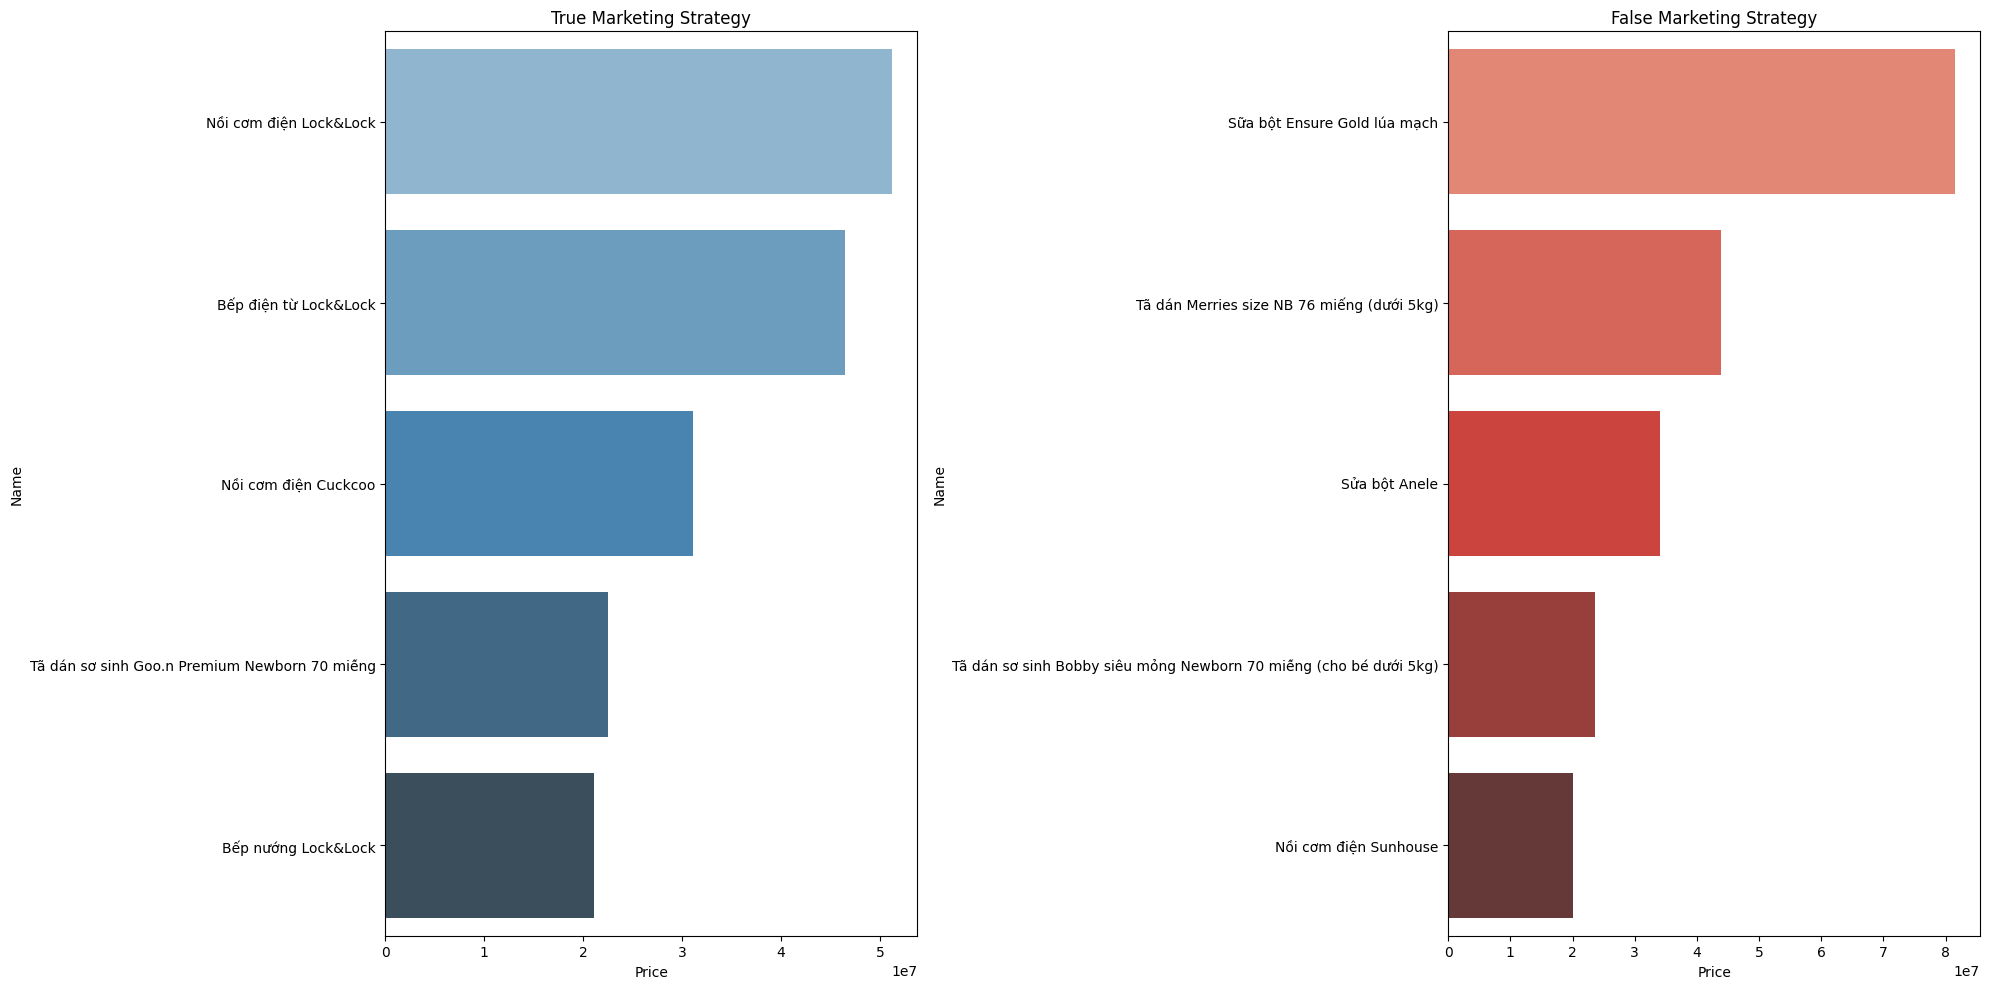

In [175]:
# Đánh giá sự hiệu quả của các chiến dịch quảng cáo với mức độ quan tâm của khách hàng với sản phẩm,
fig, ax = plt.subplots(1,2,figsize=(20,10))

sns.barplot(ax=ax[0],data = Most_sale_true_marketing.head(5),y='Name',x='Price',palette='Blues_d',orient='h')
ax[0].set_title('True Marketing Strategy')
ax[0].set_xlabel('Price')
ax[0].set_ylabel('Name')

sns.barplot(ax=ax[1],data = Most_sale_false_marketing.head(5),y='Name',x='Price',palette='Reds_d',orient='h')
ax[1].set_title('False Marketing Strategy')
ax[1].set_xlabel('Price')
ax[1].set_ylabel('Name')

plt.tight_layout()
plt.show()

**Nhận xét:**

1. Các sản phẩm có chiến dịch marketing ghi nhận doanh thu cao nhất, dao động từ 30.000.000 - 50.000.000 VNĐ, chủ yếu thuộc nhóm thiết bị gia dụng. Các sản phẩm nổi bật bao gồm: Nồi cơm điện Lock&Lock, Bếp điện từ Lock&Lock, và Nồi cơm điện Cuckoo. Điều này cho thấy chiến lược marketing đã mang lại hiệu quả, góp phần tăng cường doanh số bán hàng cho nhóm sản phẩm này.

2. Đối với các sản phẩm không có chiến dịch marketing, doanh thu cao nhất nằm trong khoảng 40.000.000 - 80.000.000 VNĐ, chủ yếu đến từ các mặt hàng sơ sinh. Những sản phẩm như Sữa bột Ensure Gold lúa mạch và Tã dán Merries size NB 76 miếng (dưới 5kg) đạt doanh thu cao đáng kể, chứng tỏ sức hút tự nhiên của các sản phẩm này ngay cả khi không có sự hỗ trợ từ chiến dịch marketing.

3. Tổng quan, một số sản phẩm thuộc danh mục đồ sơ sinh không có chiến dịch marketing lại có doanh thu vượt trội hơn hẳn so với các sản phẩm có chiến dịch quảng bá, cho thấy rằng không phải lúc nào marketing cũng là yếu tố quyết định đến doanh thu mà còn phụ thuộc vào nhu cầu tự nhiên của thị trường đối với một số loại sản phẩm nhất định.

**Kết luận**: Chiến dịch marketing mang lại hiệu quả tốt trong việc tăng doanh số cho các sản phẩm gia dụng. Tuy nhiên, các sản phẩm sơ sinh vẫn có thể đạt doanh số cao mà không cần đến chiến dịch quảng bá, cho thấy sự quan trọng của chiến lược tiếp cận thị trường dựa trên nhu cầu thực tế của người tiêu dùng.